In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import pandas as pd

from os.path import expanduser

SRC_PATH = expanduser("~") + '/SageMaker/mastering-ml-on-aws/chapter3/'


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

housing_df = pd.read_csv(SRC_PATH + 'train.csv')
training_df, test_df = train_test_split(housing_df, test_size=0.2)

training_df.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
270,418,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4
205,309,0.49298,0.0,9.90,0,0.544,6.635,82.5,3.3175,4,304,18.4,396.90,4.54,22.8
161,235,0.44791,0.0,6.20,1,0.507,6.726,66.5,3.6519,8,307,17.4,360.20,8.05,29.0
207,311,2.63548,0.0,9.90,0,0.544,4.973,37.8,2.5194,4,304,18.4,350.45,12.64,16.1
114,168,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403,14.7,227.61,12.14,23.8


In [4]:
training_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']
label = 'medv'


In [6]:
tf_regressor = tf.estimator.LinearRegressor(feature_columns=[tf.feature_column.numeric_column('inputs', shape=(11,))])


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpymw92pq8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbf02560f60>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
training_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'inputs': training_df[training_features].as_matrix()},
    y=training_df[label].as_matrix(),
    shuffle=False,
    batch_size=1,
    num_epochs=100,
    queue_capacity=1000,
    num_threads=1)

test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'inputs': test_df[training_features].as_matrix()},
    y=test_df[label].as_matrix(),
    shuffle=False,
    batch_size=1)


In [10]:
tf_regressor.train(input_fn=training_input_fn, steps=50000)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpymw92pq8/model.ckpt.
INFO:tensorflow:loss = 108.15999, step = 1
INFO:tensorflow:global_step/sec: 240.39
INFO:tensorflow:loss = 5.7247767, step = 101 (0.417 sec)
INFO:tensorflow:global_step/sec: 716.767
INFO:tensorflow:loss = 8.251297, step = 201 (0.140 sec)
INFO:tensorflow:global_step/sec: 730.48
INFO:tensorflow:loss = 12.894949, step = 301 (0.136 sec)
INFO:tensorflow:global_step/sec: 730.749
INFO:tensorflow:loss = 59.370552, step = 401 (0.137 sec)
INFO:tensorflow:global_step/sec: 715.6
INFO:tensorflow:loss = 14.77772, step = 501 (0.139 sec)
INFO:tensorflow:global_step/sec: 709.968
INFO:tensorflow:loss = 22.43846, step

INFO:tensorflow:global_step/sec: 807.148
INFO:tensorflow:loss = 49.37367, step = 7701 (0.124 sec)
INFO:tensorflow:global_step/sec: 805.465
INFO:tensorflow:loss = 19.530483, step = 7801 (0.124 sec)
INFO:tensorflow:global_step/sec: 807.515
INFO:tensorflow:loss = 22.144491, step = 7901 (0.124 sec)
INFO:tensorflow:global_step/sec: 802.982
INFO:tensorflow:loss = 4.733277, step = 8001 (0.125 sec)
INFO:tensorflow:global_step/sec: 804.712
INFO:tensorflow:loss = 27.105732, step = 8101 (0.124 sec)
INFO:tensorflow:global_step/sec: 804.015
INFO:tensorflow:loss = 8.074628, step = 8201 (0.124 sec)
INFO:tensorflow:global_step/sec: 811.489
INFO:tensorflow:loss = 1.9122812, step = 8301 (0.123 sec)
INFO:tensorflow:global_step/sec: 790.121
INFO:tensorflow:loss = 27.770954, step = 8401 (0.127 sec)
INFO:tensorflow:global_step/sec: 793.461
INFO:tensorflow:loss = 8.24031, step = 8501 (0.126 sec)
INFO:tensorflow:global_step/sec: 801.89
INFO:tensorflow:loss = 3.4055288, step = 8601 (0.125 sec)
INFO:tensorflow:

INFO:tensorflow:loss = 14.255238, step = 15901 (0.126 sec)
INFO:tensorflow:global_step/sec: 791.671
INFO:tensorflow:loss = 7.1354713, step = 16001 (0.126 sec)
INFO:tensorflow:global_step/sec: 787.583
INFO:tensorflow:loss = 1.7748053, step = 16101 (0.127 sec)
INFO:tensorflow:global_step/sec: 789.518
INFO:tensorflow:loss = 37.452194, step = 16201 (0.127 sec)
INFO:tensorflow:global_step/sec: 790.179
INFO:tensorflow:loss = 9.587854, step = 16301 (0.127 sec)
INFO:tensorflow:global_step/sec: 790.377
INFO:tensorflow:loss = 5.856797, step = 16401 (0.126 sec)
INFO:tensorflow:global_step/sec: 791.926
INFO:tensorflow:loss = 28.291195, step = 16501 (0.126 sec)
INFO:tensorflow:global_step/sec: 768.503
INFO:tensorflow:loss = 5.5058494, step = 16601 (0.130 sec)
INFO:tensorflow:global_step/sec: 765.043
INFO:tensorflow:loss = 45.48768, step = 16701 (0.131 sec)
INFO:tensorflow:global_step/sec: 778.599
INFO:tensorflow:loss = 8.4815645, step = 16801 (0.128 sec)
INFO:tensorflow:global_step/sec: 773.369
INF

INFO:tensorflow:global_step/sec: 793.89
INFO:tensorflow:loss = 6.977112, step = 24201 (0.126 sec)
INFO:tensorflow:global_step/sec: 794.025
INFO:tensorflow:loss = 110.91309, step = 24301 (0.126 sec)
INFO:tensorflow:global_step/sec: 793.336
INFO:tensorflow:loss = 106.83188, step = 24401 (0.126 sec)
INFO:tensorflow:global_step/sec: 810.406
INFO:tensorflow:loss = 2.2853916, step = 24501 (0.123 sec)
INFO:tensorflow:global_step/sec: 808.139
INFO:tensorflow:loss = 2.842528, step = 24601 (0.124 sec)
INFO:tensorflow:global_step/sec: 803.451
INFO:tensorflow:loss = 5.2500463, step = 24701 (0.124 sec)
INFO:tensorflow:global_step/sec: 772.365
INFO:tensorflow:loss = 1.2818774, step = 24801 (0.130 sec)
INFO:tensorflow:global_step/sec: 789.057
INFO:tensorflow:loss = 3.5473895, step = 24901 (0.127 sec)
INFO:tensorflow:global_step/sec: 773.992
INFO:tensorflow:loss = 26.325718, step = 25001 (0.129 sec)
INFO:tensorflow:global_step/sec: 766.898
INFO:tensorflow:loss = 4.228319, step = 25101 (0.130 sec)
INFO

In [19]:
tf_regressor.evaluate(input_fn=test_input_fn)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-03-16:37:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpymw92pq8/model.ckpt-26600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-03-16:37:06
INFO:tensorflow:Saving dict for global step 26600: average_loss = 37.858795, global_step = 26600, label/mean = 22.91492, loss = 37.858795, prediction/mean = 21.380392
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 26600: /tmp/tmpymw92pq8/model.ckpt-26600


{'average_loss': 37.858795,
 'label/mean': 22.91492,
 'loss': 37.858795,
 'prediction/mean': 21.380392,
 'global_step': 26600}

In [20]:
predictions = tf_regressor.predict(input_fn=test_input_fn)


In [21]:
predicted_values = [prediction['predictions'][0] for prediction in predictions]


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpymw92pq8/model.ckpt-26600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [22]:
predicted_values[:5]


[22.076485, 23.075985, 17.803957, 20.629128, 28.749748]

In [23]:
len(test_df)


67

In [24]:
len(predicted_values)


67

In [25]:
test_df['prediction'] = predicted_values


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [26]:
test_df.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,prediction
33,54,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4,22.076485
57,85,0.05059,0.0,4.49,0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62,23.9,23.075985
324,492,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6,17.803957
299,461,4.81213,0.0,18.10,0,0.713,6.701,90.0,2.5975,24,666,20.2,255.23,16.42,16.4,20.629128
178,265,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,5,264,13.0,387.89,8.10,36.5,28.749748


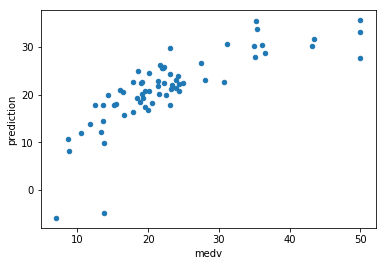

In [27]:
test_df.plot(kind='scatter', x=label, y='prediction')
